<a href="https://colab.research.google.com/github/lisa1612/CNN/blob/main/CNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np

In [3]:
#Load the MNIST dataset and split it into training and testing sets
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train[0]  #Displays the pixel values of the first training image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [9]:
#Create the convolutional neural network model
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Training the Neural Network

In [10]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2302 - accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0808 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0584 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0378 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 58s 31m

Testing the Neural Network

In [12]:
#Evaluating the performance of the convolutional neural network on the testing dataset
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0687 - accuracy: 0.9835


[0.0686541497707367, 0.9835000038146973]

Finding Accuracy of Testing and Training Model and Confusion Matrix

In [14]:
train_predictions = np.argmax(convolutional_neural_network.predict(X_train), axis=-1)
test_predictions = np.argmax(convolutional_neural_network.predict(X_test), axis=-1)

# Calculate accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate confusion matrix
train_confusion_matrix = confusion_matrix(y_train, train_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:")
print(train_confusion_matrix)
print("Test Confusion Matrix:")
print(test_confusion_matrix)

313/313 [==============================] - 3s 9ms/step
Train Accuracy: 0.9943
Test Accuracy: 0.9835
Train Confusion Matrix:
[[5919    0    0    0    4    0    0    0    0    0]
 [   0 6732    1    1    2    1    1    3    1    0]
 [   1    1 5929    8    5    0    0   10    4    0]
 [   0    0    1 6127    0    0    0    2    0    1]
 [   1    0    0    0 5840    0    0    1    0    0]
 [  12    0    0   11    3 5390    3    1    0    1]
 [   5    1    0    0   28    2 5882    0    0    0]
 [   0    5   12    1    0    0    0 6247    0    0]
 [  10    0    0    0   25    5    1    2 5806    2]
 [  13    0    0    1  128    1    0   20    0 5786]]
Test Confusion Matrix:
[[ 973    1    0    0    2    0    1    3    0    0]
 [   0 1129    0    2    2    0    0    1    1    0]
 [   3    0 1010    2    4    0    1   12    0    0]
 [   0    0    2 1003    0    2    0    2    1    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   4    2    0    8    0  874    2    1    0    1]
 [  

1/1 [==============================] - 0s 88ms/step


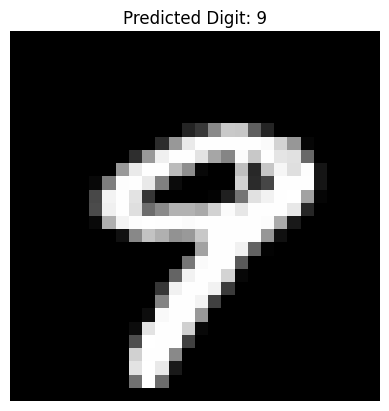

In [25]:
import matplotlib.pyplot as plt
number = 9
# Preparing the input image
input_image = X_test[number].reshape(1, 28, 28, 1)

# Predicts the digit
predicted_digit = np.argmax(convolutional_neural_network.predict(input_image))

# Displays the input image and the predicted digit
plt.imshow(X_test[number].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()